In [2]:
import pandas as pd

In [6]:
df=pd.read_csv("data/Crop_recommendation.csv")

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [25]:
## dependent and independent feature

X = df.drop(labels=['label'],axis=1)
y = df.iloc[:, -1]  # Select last column


In [27]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [28]:
## seagregate numerical and catergorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
catergorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

In [29]:
numerical_feature

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [30]:
catergorical_feature

['label']

<Axes: ylabel='Count'>

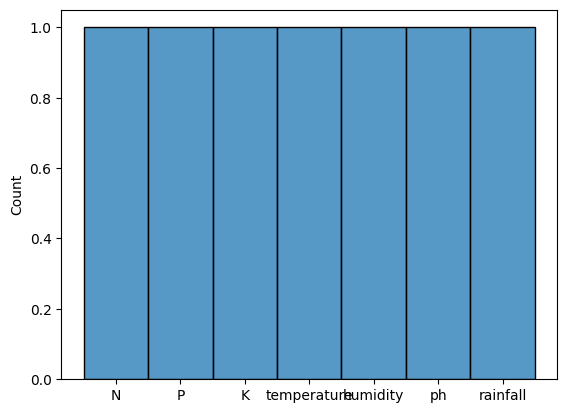

In [32]:
import seaborn as sns
sns.histplot(numerical_feature)

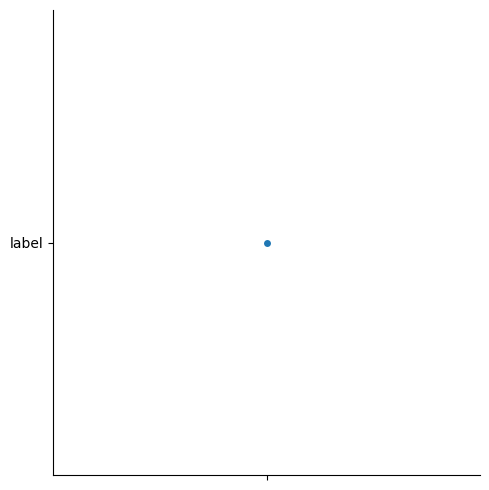

In [33]:
sns.catplot(catergorical_feature)

In [34]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=regressor.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9848484848484849
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       0.97      1.00      0.98        31
   blackgram       1.00      0.84      0.91        25
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        32
        jute       0.96      0.96      0.96        26
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.89      0.97      0.93        32
       maize       0.97      0.97      0.97        35
       mango       1.00      1.00      1.00        25
   mothbeans       0.97      0.97      0.97        29
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        42
      orange       1.00      1.00      1.00        22
      pa